**Author - Vaishnavi Patel**

---


# Grip@ The Spark Foundation Task 1
# **Prediction using Supervised ML**


Importing all the required libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset

In [17]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Successfully imported data into console" )  

df.head(20)

Successfully imported data into console


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualizing the Dataset

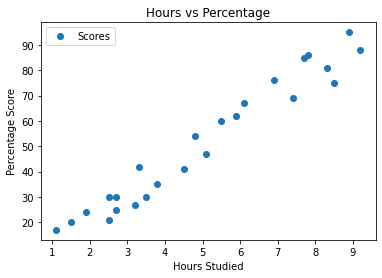

In [19]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [20]:
df.corr()  #checking correlation between hours and scores

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above graph we can see that there is positive linear relation between Hours Studied & Percentage Score 



### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [21]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets.
We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 
logmodel = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
logmodel.fit(X_train, y_train)
 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [23]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(X_train, y_train) 

print("Training complete !")

Training complete !


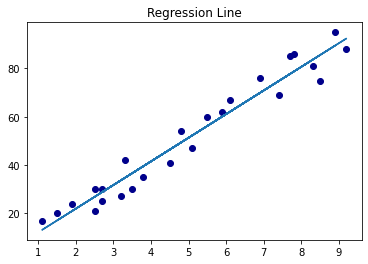

In [24]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.title('Regression Line')
plt.scatter(X, y,c="darkblue")
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [25]:
print(X_test) # Testing data - In Hours
y_pred = regression.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [ ]:
df.score(X,y)

In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


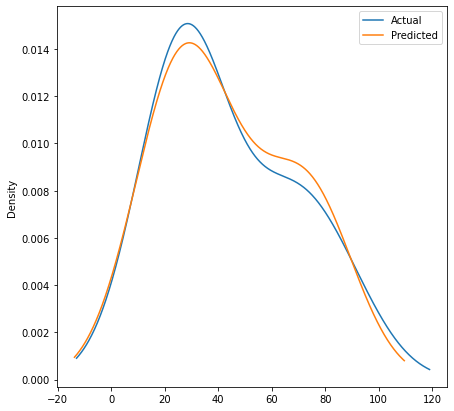

In [27]:
#Plotting bar chart to see the difference between actual vs predicted 
df.plot(kind='kde', figsize=(7, 7))
plt.show()

In [28]:
# You can also test with your own data
hours = [6.7]
own_pred = regression.predict([hours])  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(round(own_pred[0],2)))

Number of hours = [6.7]
Prediction Score = 67.95


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027651
